In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv('insurance.csv')

In [31]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
data.shape

(1338, 7)

In [33]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 1338
Number of Columns 7


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


#### Check Null Values In The Dataset

In [35]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Get Overall Statistics About The Dataset

In [36]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


#### Covert Columns From String ['sex' ,'smoker','region' ] To Numerical Values

In [37]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [39]:
data['sex']=data['sex'].map({'female':0,'male':1})

In [40]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [41]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [42]:
data['region']=data['region'].map({'southwest':1,'southeast':2,
                   'northwest':3,'northeast':4})

In [43]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,1,16884.92400
1,18,1,33.770,1,no,2,1725.55230
2,28,1,33.000,3,no,2,4449.46200
3,33,1,22.705,0,no,3,21984.47061
4,32,1,28.880,0,no,3,3866.85520


In [54]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [55]:
data['smoker']=data['smoker'].map({'no':0,'yes':1})

#### Store Feature Matrix In X and Response(Target) In Vector y

In [56]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [57]:
X = data.drop(['charges'],axis=1)

In [58]:
y = data['charges']

#### Train/Test split
1. Split data into two part : a training set and a testing set
2. Train the model(s) on training set
3. Test the Model(s) on Testing set

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
170     13405.39030
277      2150.46900
1033    13747.87235
209      6610.10970
947     39047.28500
140     27375.90478
1140     9048.02730
1106     8988.15875
199     14901.51670
932     10096.97000
316      8835.26495
1207    38415.47400
10       2721.32080
147      9877.60770
1240    47269.85400
282      4237.12655
477      2534.39375
1334     2205.98080
859     10965.44600
380     15006.57945
390     10736.87075
425      9788.86590
892     10422.91665
481      9304.70190
990      3378.91000
           ...     
510     11763.00090
1082     5855.90250
474     25382.29700
856     40974.16490
747      1627.28245
252     44260.74990
21       4149.73600
459      7682.67000
1184    18328.23810
276      2803.69785
955      3875.73410
1215    12890.05765
385      1261.85900
805      7731.85785
343     13981.85035
769      6933.24225
130     12815.44495
871      3392.36520
1123    18903.49141


#### Import the models

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#### Model Training

In [63]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

#### Prediction on Test Data

In [64]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,
                  'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [65]:
df1

,Actual,Lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,11197.658777,11001.128629
887,5272.17580,7116.295018,9492.515425,5312.460110,5840.174656
890,29330.98315,36909.013521,9648.758701,28312.463360,28001.980112
1293,9301.89355,9507.874691,9555.044136,9684.127472,9745.291602
259,33750.29180,27013.350008,9420.421978,34413.846462,33639.100981
1312,4536.25900,10790.779562,9490.957928,9277.798020,5369.926526
899,2117.33885,226.298446,9420.457042,2168.380435,2686.290564
752,14210.53595,16942.715999,9651.285956,14366.078681,15046.074645
1286,3732.62510,1056.630794,9452.026075,5008.495036,4994.851313
707,10264.44210,11267.919973,9576.082769,10151.066893,10957.880429


#### Compare Performance Visually

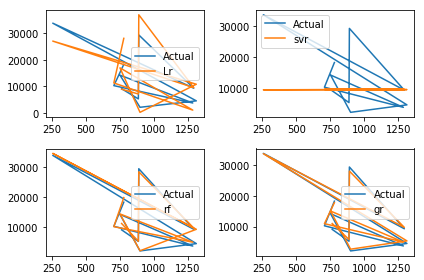

In [66]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svr")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")

plt.tight_layout()

plt.legend()

#### Evaluating the Algorithm

In [67]:
from sklearn import metrics

In [68]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [69]:
print(score1,score2,score3,score4)

0.7833463107364538 -0.07229762787861826 0.8634725601136897 0.8779726251291786


In [70]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [71]:
print(s1,s2,s3,s4)

4186.5088983664355 8592.428727899724 2468.321652229789 2447.9515580545844


#### Predict Charges For New Customer

In [72]:
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}

df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [73]:
new_pred = gr.predict(df)
print("Medical Insurance cost for new : ",new_pred)

Medical Insurance cost for new :  [43931.13613049]


#### Save Model Usign Joblib

In [74]:
import joblib

In [75]:
joblib.dump(gr,'model_joblib_test')

['model_joblib_test']

In [76]:
model = joblib.load('model_joblib_test')

In [77]:
model.predict([[40,1,40.3,4,1,2]])

array([43931.13613049])

#### GUI

In [78]:
from tkinter import *

In [79]:
import joblib

In [80]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())

    model = joblib.load('model_joblib_gr')
    result = model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master, text = "Insurance Cost").grid(row=7)
    Label(master, text=result).grid(row=8)


master =Tk()
master.title("Insurance Cost Prediction")
label = Label(master,text = "Insurance Cost Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Enter Your Age").grid(row=1)
Label(master,text = "Male Or Female [1/0]").grid(row=2)
Label(master,text = "Enter Your BMI Value").grid(row=3)
Label(master,text = "Enter Number of Children").grid(row=4)
Label(master,text = "Smoker Yes/No [1/0]").grid(row=5)
Label(master,text = "Region [1-4]").grid(row=6)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)



e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)


Button(master,text="Predict",command=show_entry).grid()

mainloop()